# Fitting a sum of Breit-Wigner distributions

Fitting a curve that cannot be easily fitted with the common families of curves (polynomials, trigonometric functions, etc.), a sum of Breit-Wignet distributions:
$$
\sigma(s) = \sum_i \frac{c_i}{(s - m_i)^2 + m_i^2 \Gamma_i^2}
$$
The cross section of a process with several particle resonances with masses $m_i$ and widths $\Gamma_i$ would have this form.

In [ ]:
%%capture
!pip install elvet

In [7]:
import elvet


coeffs = 2, 3, 3
masses = 0, 5, 8
widths = 0, 2, 1


def sigma(s):
    return sum(
        coeff / ((s - mass**2)**2 + mass**2 * width**2)
        for coeff, mass, width in zip(coeffs, masses, widths)
    )


domain = elvet.box((5, 120, 100))
model = elvet.nn(1, 5, 5, 5, 1)
fitter = elvet.fitter(domain, sigma(domain), model=model, epochs=70000, lr=0.01)

 Elvet: Setting optimizer parameter 'lr' to 0.01
 Elvet: epoch = 1, loss = 1.51e+00, elapsed time = 00:00:00
 Elvet: epoch = 10000, loss = 5.42e-05, elapsed time = 00:00:04
 Elvet: epoch = 20000, loss = 5.43e-05, elapsed time = 00:00:09
 Elvet: epoch = 30000, loss = 5.39e-05, elapsed time = 00:00:14
 Elvet: epoch = 40000, loss = 5.05e-05, elapsed time = 00:00:18
 Elvet: epoch = 50000, loss = 5.04e-05, elapsed time = 00:00:23
 Elvet: epoch = 60000, loss = 4.17e-06, elapsed time = 00:00:27
 Elvet: epoch = 70000, loss = 9.52e-07, elapsed time = 00:00:32


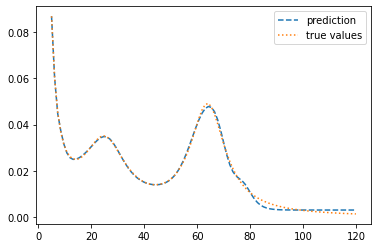

In [8]:
import elvet.plotting

elvet.plotting.plot_prediction(fitter, true_function=sigma)